# Exercises in Data Transformation and Exploratory Data Analysis

This notebook contains the exercises for the class of February 5, 2025, in the course Data & Things at Roskilde University.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exercise 1

Plot the number of Cinemas in Danmark over the years. The next cell loads in the needed data for you if you have the file "DK_cinemas.csv" in the same folder as this notebook. 

In [2]:
cinema_data = pd.read_csv('C:\\Users\\Hassan\\Desktop\\Data and Things\\code\\DAT_Exercises\\data\\DK_cinemas.csv', sep=";")
years = cinema_data["Year"].tolist()
cinemas = cinema_data["Cinemas"].tolist()

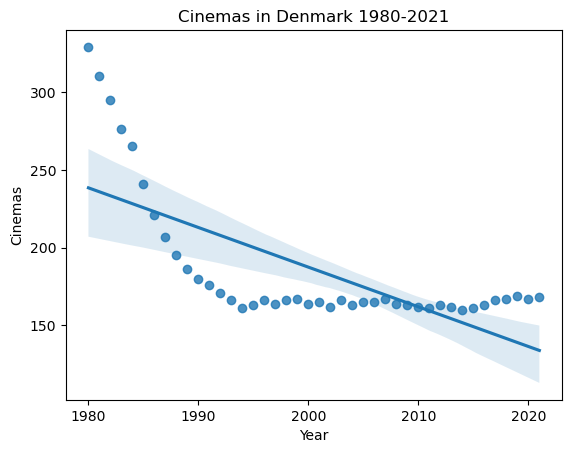

In [3]:
#using Seaborn
sns.regplot(x = "Year", y = "Cinemas", data = cinema_data)
plt.title("Cinemas in Denmark 1980-2021")
plt.show()

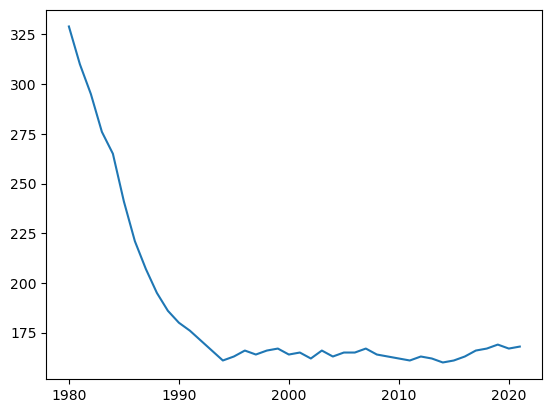

In [4]:
#using matplotlib
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.plot(cinema_data["Year"], cinema_data["Cinemas"])

## Exercise 2

In this exercise, we are going to use the `penguins` dataset from the Seaborn package. The cell below loads the data

In [5]:
penguins_data = sns.load_dataset("penguins")
penguins_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Based on the `Penguins` dataset, answer the following questions:

1. Make a barplot that shows how many penguins there are of each species in the dataset. Support the plot by calculating the numbers.
2. Make a barplot that shows the average body mass for each species of penguin. Support the plot by calculating the numbers
3. Make a boxplots that shows the distribution of the body mass for each species of penguin. Support the plot by calculating the numbers.
4. Make a scatterplot that shows the correlation between body mass (in g) and flipper length (in mm). Support the plot by calculating the numbers.
5. Use boxplots and histograms to show how bill length, bill depth, flipper length and body mass varies between species and sex.
6. Visualise how the linear correlation between body mass and flipper length varies between species and sex.

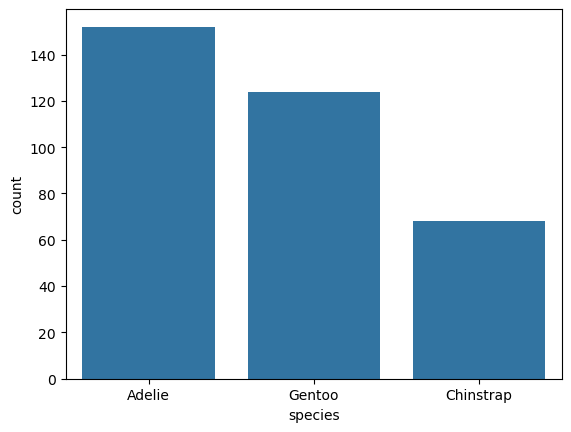

In [6]:
#Penguin 1
#Make a barplot that shows how many penguins there are of each species in the dataset. Support the plot by calculating the numbers.
peng_spec = penguins_data['species'].value_counts().reset_index()
sns.barplot(data= peng_spec, x='species', y= 'count')
plt.show()

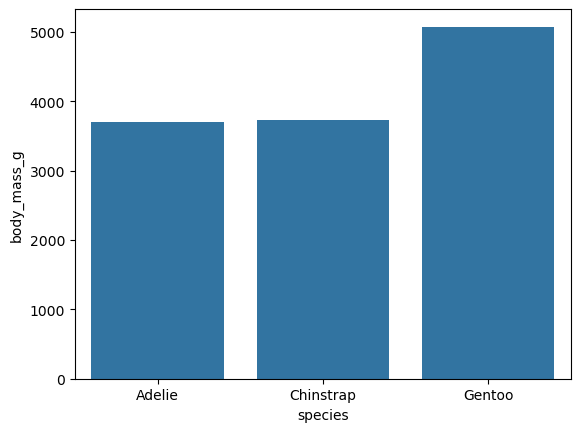

In [7]:
#Penguin 2.1
#2. Make a barplot that shows the average body mass for each species of penguin. Support the plot by calculating the numbers
avg_body_mass_species = penguins_data[['species','body_mass_g']].groupby('species').mean().reset_index()
avg_body_mass_species
sns.barplot(data=avg_body_mass_species, x='species', y='body_mass_g')
plt.show()

In [8]:
#Penguin 2.2
# Support the plot by calculating the numbers
avg_body_mass_species

,species,body_mass_g
0,Adelie,3700.662252
1,Chinstrap,3733.088235
2,Gentoo,5076.016260


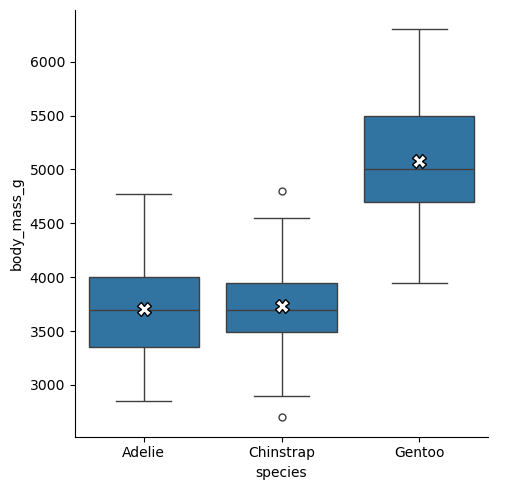

In [9]:
#Penguin 3.1
#Make a boxplots that shows the distribution of the body mass for each species of penguin. 
sns.catplot(x="species", y="body_mass_g", data = penguins_data, kind="box", showmeans=True, meanprops={"marker":"X", "markerfacecolor":"white", "markeredgecolor":"black", "markersize": "10"})
plt.show()

In [10]:
#Penguins 3.2
#Support the plot by calculating the numbers.
penguins_data[['species','body_mass_g']].groupby('species').describe().reset_index()

species body_mass_g                                                   \
                   count         mean         std     min     25%     50%   
0     Adelie       151.0  3700.662252  458.566126  2850.0  3350.0  3700.0   
1  Chinstrap        68.0  3733.088235  384.335081  2700.0  3487.5  3700.0   
2     Gentoo       123.0  5076.016260  504.116237  3950.0  4700.0  5000.0   

                   
      75%     max  
0  4000.0  4775.0  
1  3950.0  4800.0  
2  5500.0  6300.0

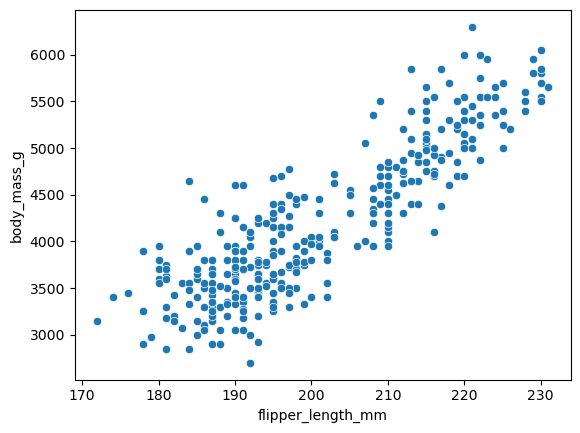

In [11]:
#Penguins 4.1
#Make a scatterplot that shows the correlation between body mass (in g) and flipper length (in mm).

#matplot lib
# f = penguins_data["flipper_length_mm"]
# b = penguins_data["body_mass_g"]
#plt.scatter(f, b)


#Seaborn regression plot
#sns.regplot(x="flipper_length_mm", y="body_mass_g", data= penguins_data)


#Seaborn scatterplot
sns.scatterplot(x="flipper_length_mm", y="body_mass_g", data= penguins_data)
plt.show()

In [12]:
#Penguins 4.2
#Support the plot by calculating the numbers.
f = penguins_data["flipper_length_mm"]
b = penguins_data["body_mass_g"]
f.corr(b)

0.8712017673060114

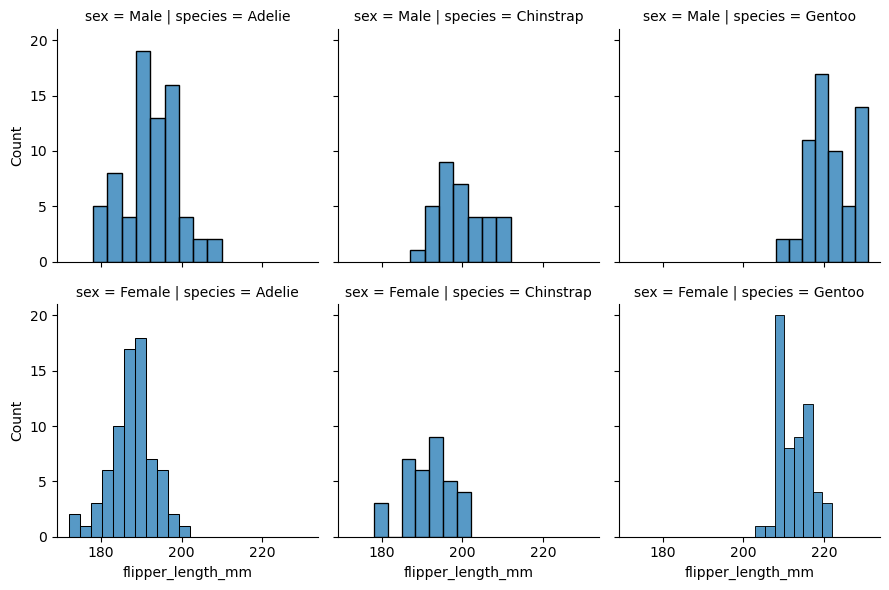

In [13]:
#Penguins 5.1
#Use boxplots and histograms to show how bill length, bill depth, flipper length and body mass varies between species and sex.

##flipper_length_mm over species and sex
grid = sns.FacetGrid(penguins_data, col="species", row="sex")

grid.map(sns.histplot, "flipper_length_mm")
plt.show()




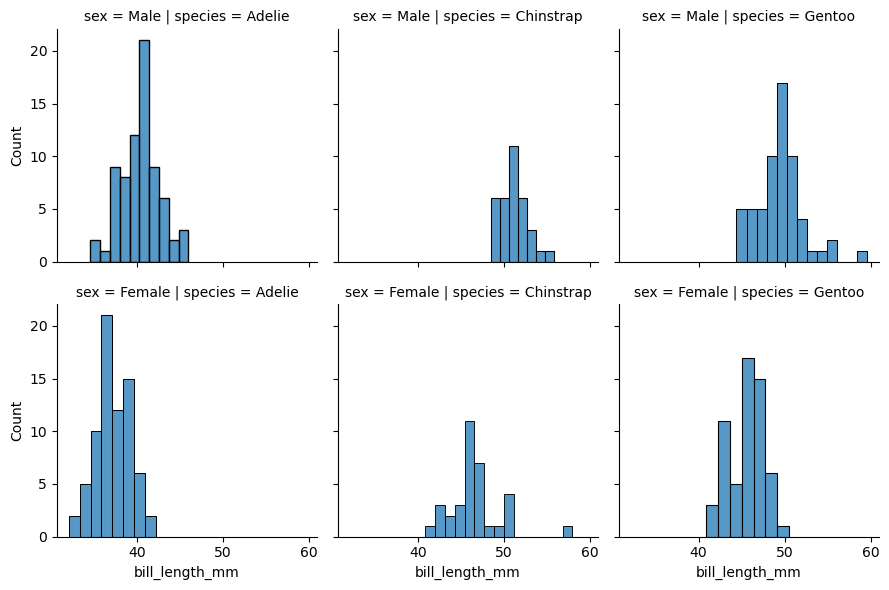

In [14]:
#Penguins 5.2
#Use boxplots and histograms to show how bill length, bill depth, flipper length and body mass varies between species and sex.


## bill_length_mm over species and sex
grid = sns.FacetGrid(penguins_data, col="species", row="sex")
grid.map(sns.histplot, "bill_length_mm")
plt.show()


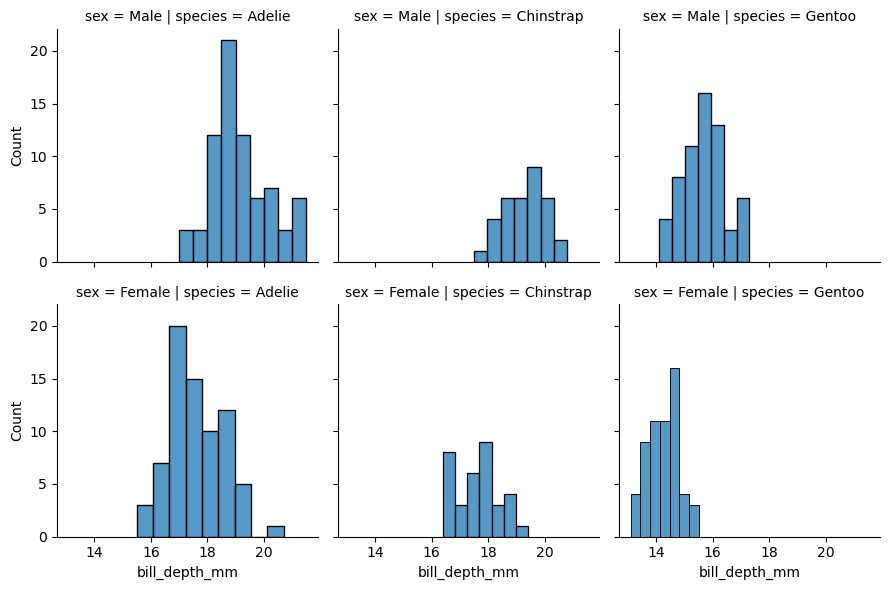

In [15]:
#Penguins 5.3
#Use boxplots and histograms to show how bill length, bill depth, flipper length and body mass varies between species and sex.


## bill_depth_mm over species and sex
grid = sns.FacetGrid(penguins_data, col="species", row="sex")
grid.map(sns.histplot, "bill_depth_mm")
plt.show()

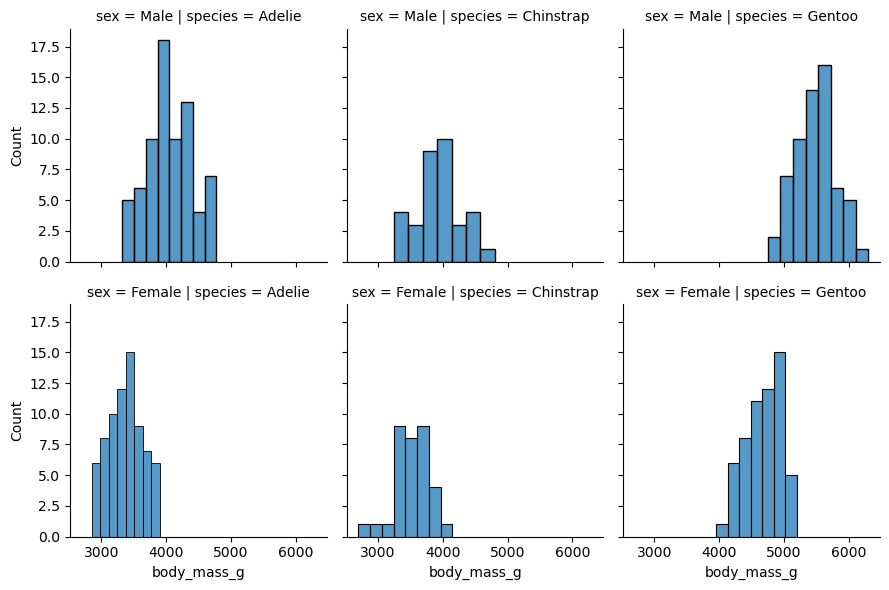

In [16]:
#Penguins 5.4
#Use boxplots and histograms to show how bill length, bill depth, flipper length and body mass varies between species and sex.


## bill_depth_mm over species and sex
grid = sns.FacetGrid(penguins_data, col="species", row="sex")
grid.map(sns.histplot, "body_mass_g")
plt.show()

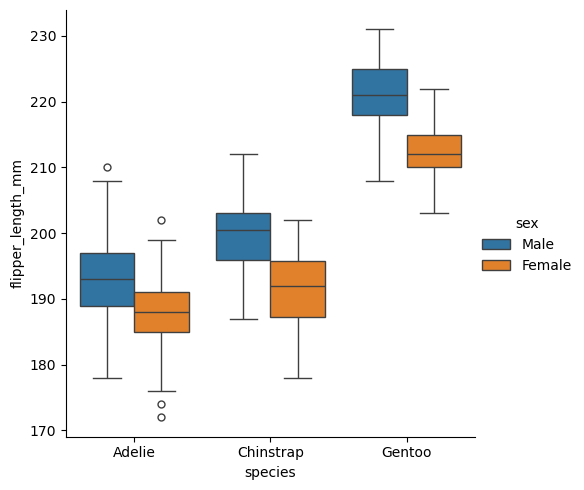

In [17]:
#Penguins 5.1 - boxplot flipper_length_mm

##flipper_length_mm over species and sex
sns.catplot(data = penguins_data, x="species", y="flipper_length_mm", kind="box", hue="sex")
plt.show()

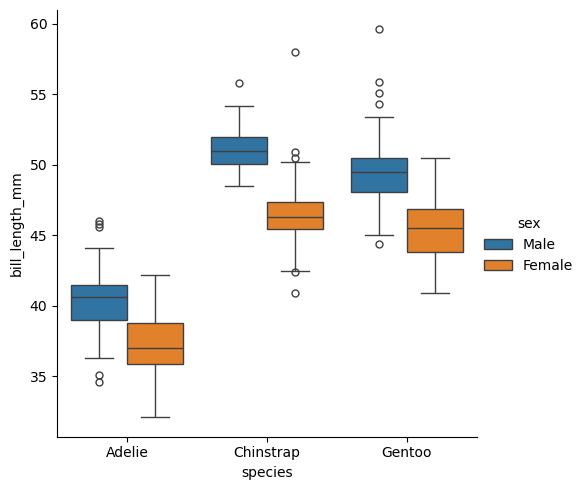

In [18]:
#Penguins 5.2 - boxplot bill_length_mm
sns.catplot(data = penguins_data, x="species", y="bill_length_mm", kind="box", hue="sex")
plt.show()

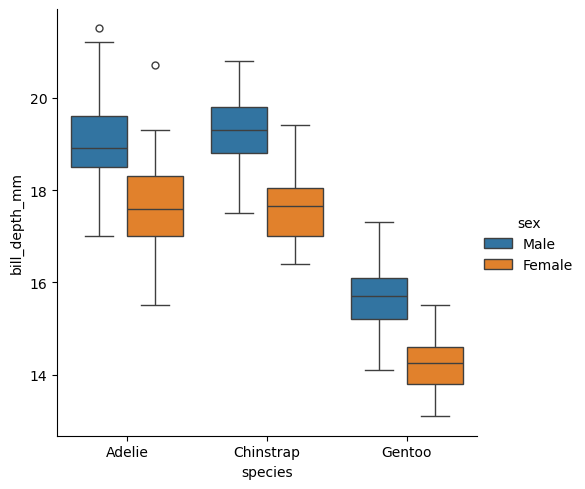

In [19]:
#Penguins 5.3 - boxplot bill_depth_mm
sns.catplot(data = penguins_data, x="species", y="bill_depth_mm", kind="box", hue="sex")
plt.show()

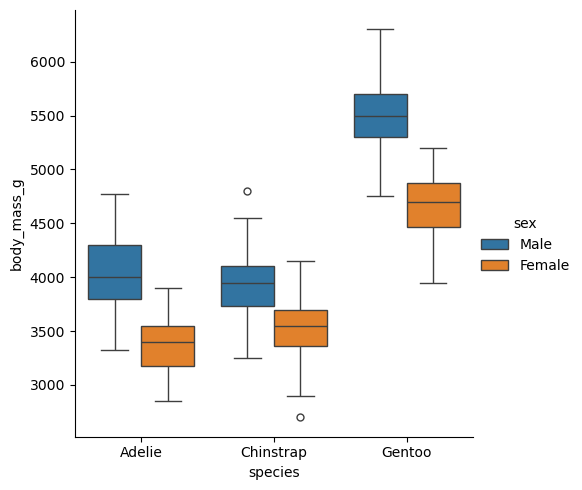

In [20]:
#Penguins 5.4 - boxplot body_mass_g
sns.catplot(data = penguins_data, x="species", y="body_mass_g", kind="box", hue="sex")
plt.show()


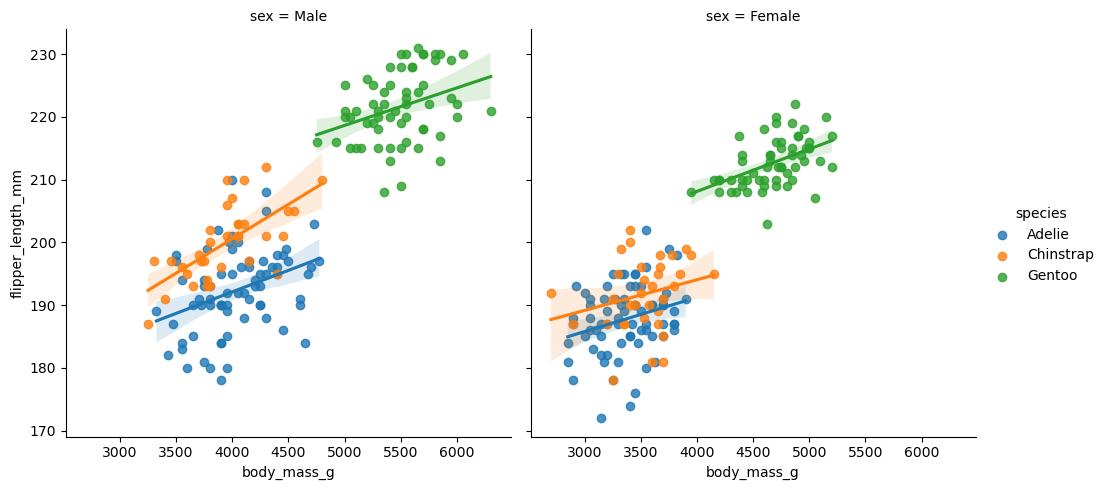

In [21]:
# Visualise how the linear correlation between body mass and flipper length varies between species and sex.

sns.lmplot(data=penguins_data, x="body_mass_g", y="flipper_length_mm", hue="species",col="sex")
plt.show()



## Exercise 3

Do an exploratory data analysis of the adult dataset. The cell below loads the dataset from UCI Machine Learning Repository into a pandas dataframe called `adult_data`. It requires that you have installed the package `ucimlrepo`. (Otherwise the dataset is on model for this class.)

In [22]:
from matplotlib import pyplot as plt
from ucimlrepo import fetch_ucirepo 
adult = fetch_ucirepo(id=2) 
X = adult.data.features 
y = adult.data.targets 
X["income"] = y
adult_data = X.copy()

adult_data



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [23]:
#•Exploratory Data Analysis
adult_data.head()

#What type of variation occurs within my variables?
# Numeric:
# "age","fnlwgt"

# Categorical:
# "workclass","education", "education-num", "marital-status", "occupation",
# "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", 
# "native-country", "income"


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [24]:
#Check for N/A values
#shows that there are n/a values in the DF specifically in workclass, occupation and native-country
adult_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [25]:
#count the true and false for each column containing n/A
wc = adult_data["workclass"].isna().value_counts()
oc = adult_data["occupation"].isna().value_counts()
nc = adult_data["native-country"].isna().value_counts()

print(wc, "\n")
print(oc, "\n")
print(nc, "\n")

workclass
False    47879
True       963
Name: count, dtype: int64 

occupation
False    47876
True       966
Name: count, dtype: int64 

native-country
False    48568
True       274
Name: count, dtype: int64 



In [26]:
# dropping rows containing N/A values 
adult_data= adult_data.dropna()

In [27]:
# displays that there has been two different ways of displaying income categories. With and without . after the K.
adult_data['income'].value_counts()

income
<=50K     24720
<=50K.    11360
>50K       7841
>50K.      3700
Name: count, dtype: int64

In [28]:
# Combining the categories into two
adult_data = adult_data.replace({"<=50K." : "<=50K", ">50K.": ">50K" })
adult_data['income'].value_counts()

income
<=50K    36080
>50K     11541
Name: count, dtype: int64

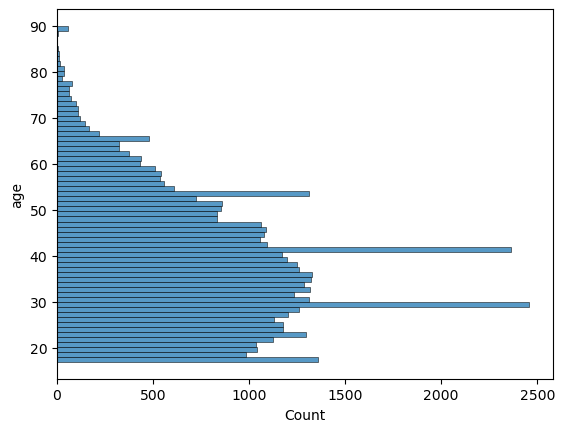

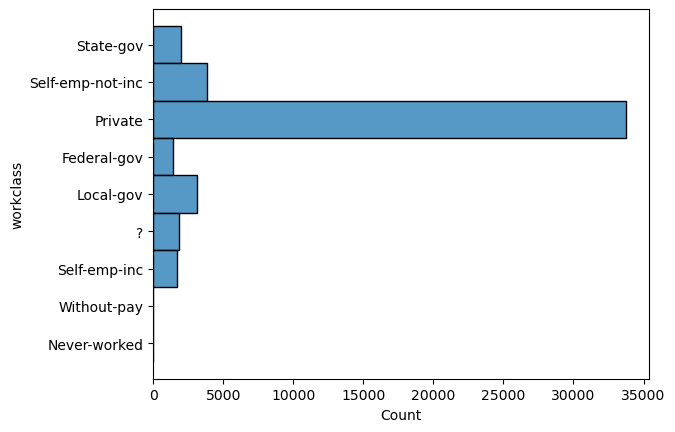

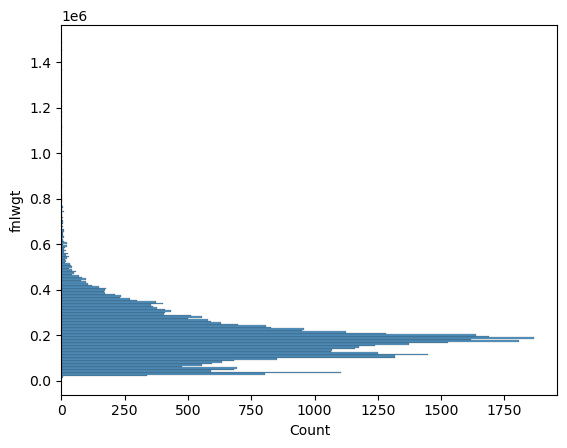

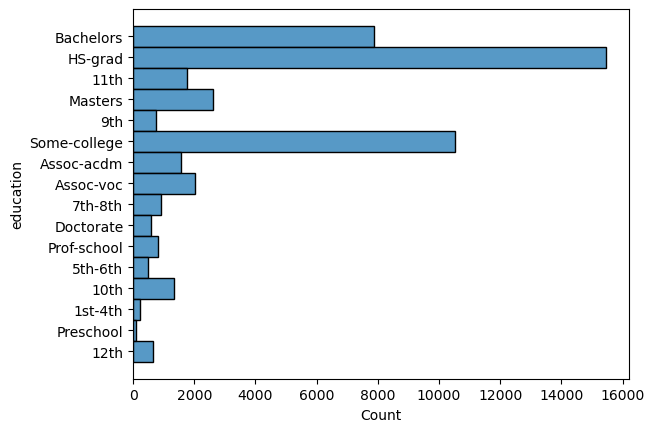

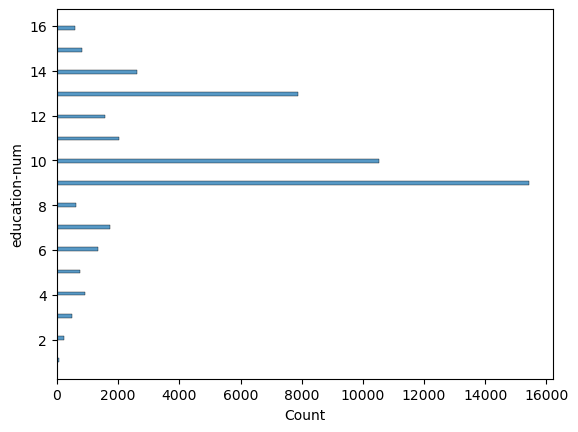

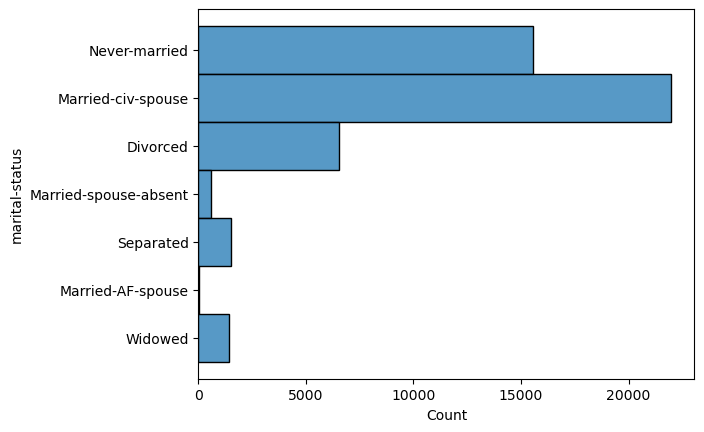

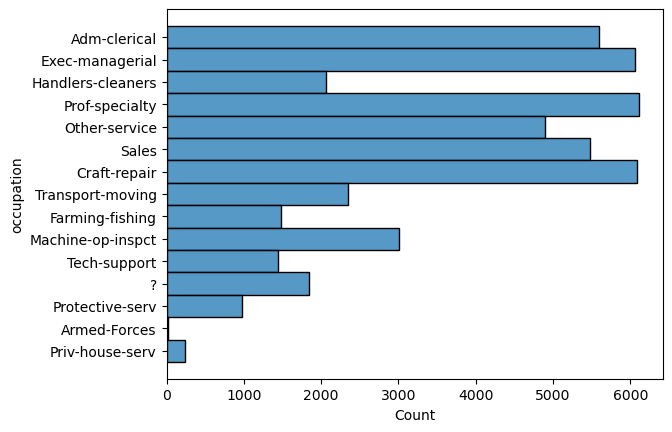

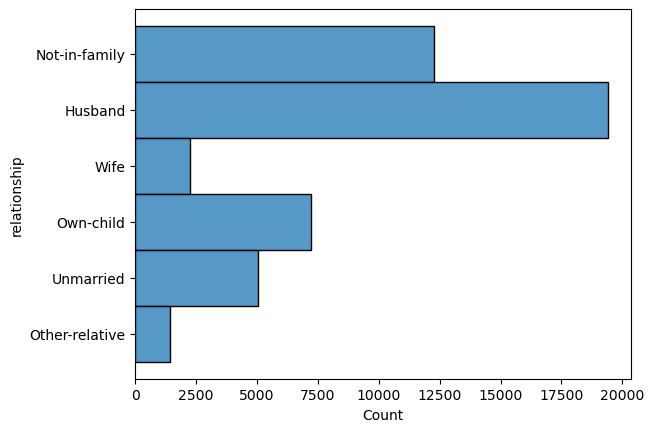

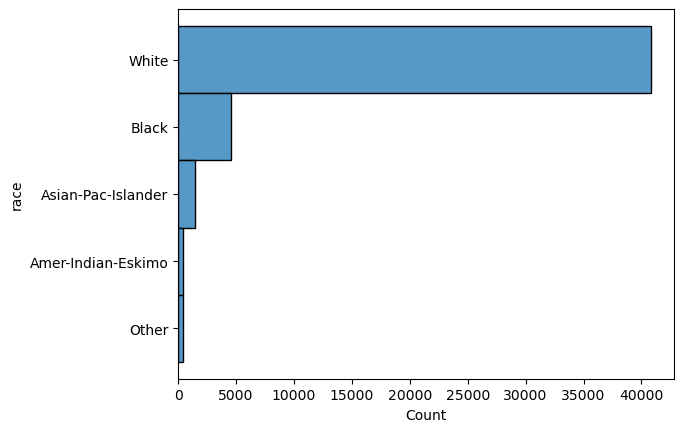

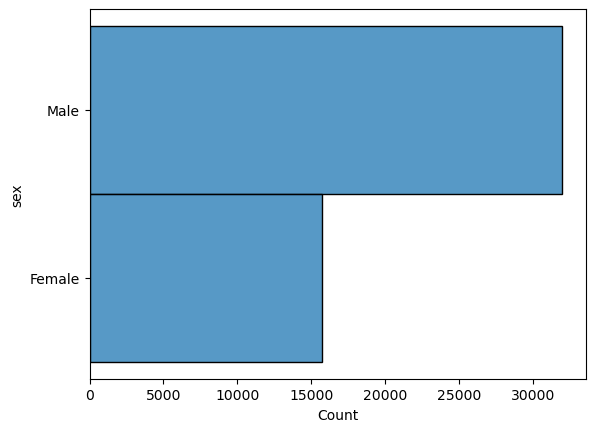

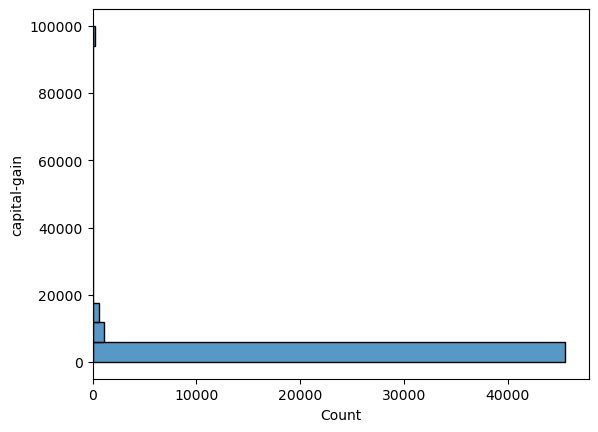

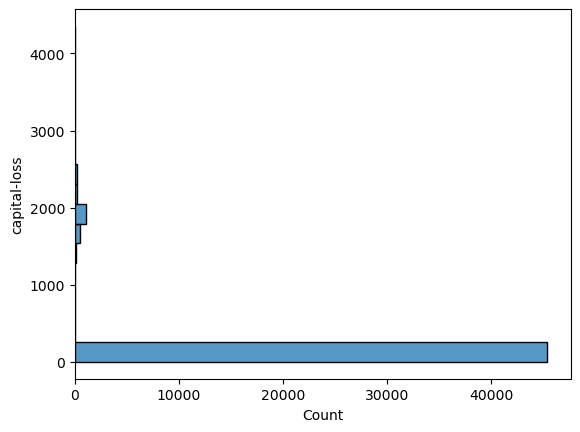

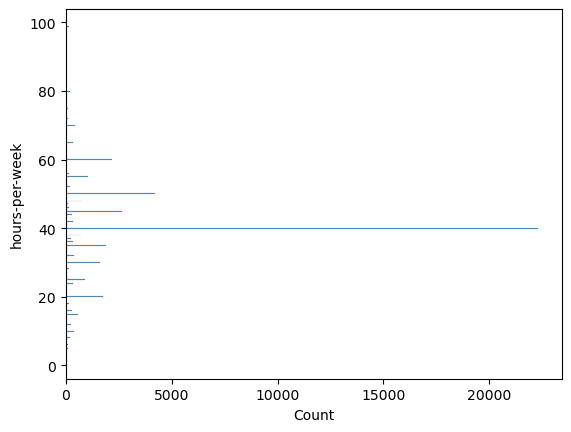

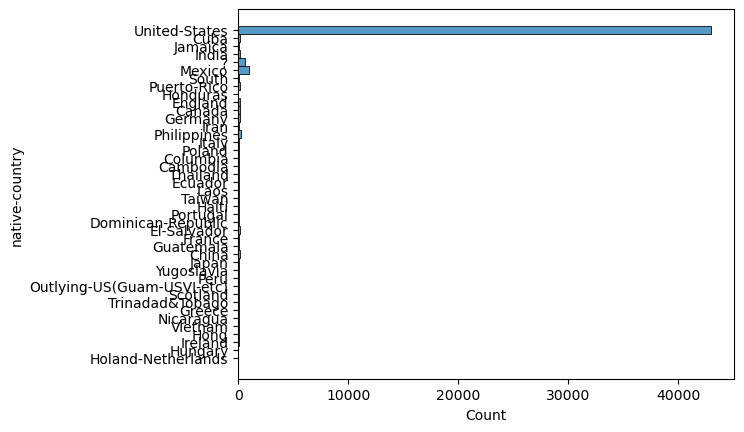

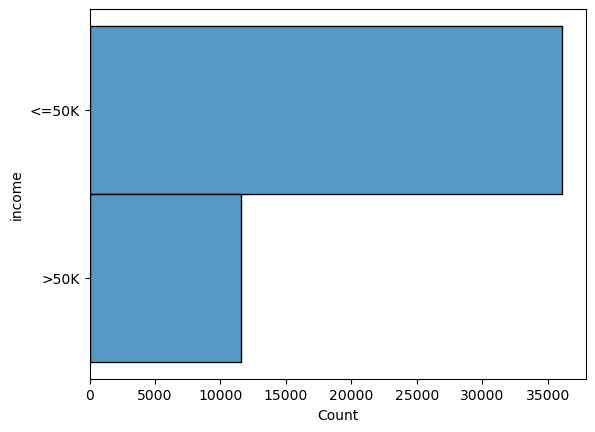

In [29]:
# just visual overview of all the columns and the count of their values 
cols = ["age", "workclass","fnlwgt","education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

for c in cols:
    sns.histplot(data = adult_data, y = c)
    plt.show()



In [30]:
#There are records where the value in columns occupations and  work is meerly "?".
# removing these

#first attempt - something off here
# adult_data = adult_data['occupation'].apply(lambda x: any("?")).reset_index()
# adult_data = adult_data['work-class'].apply(lambda x: any("?")).reset_index()

adult_data = adult_data[~adult_data.apply(lambda row: '?' in row.values, axis=1)]
adult_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


## Exercise 4

Complete an exploratory data analysis of the titanic dataset (it is on moodle). (Remember, you can load it in as `titanic_data = pd.read_csv("titanic_survival_data.csv")`)

In [31]:
titanic_data = pd.read_csv('C:\\Users\\Hassan\\Desktop\\Data and Things\\code\\DAT_Exercises\\data\\titanic_survival_data.csv', sep=",")
titanic_data.head()



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.250,S
1,1,1,female,38.0,1,0,712.833,C
2,1,3,female,26.0,0,0,7.925,S
3,1,1,female,35.0,1,0,53.100,S
4,0,3,male,35.0,0,0,8.050,S


# Overview
The dataset contains information about Titanic passengers, including their class, gender, age, familial relations onboard, fare paid, and the port from which they embarked.

---

# Columns

### 1. Survived
**Type:** Categorical  
- **1** = Survived  
- **0** = Did not survive

### 2. Pclass
**Type:** Categorical  
- **1** = Passenger Class 1  
- **2** = Passenger Class 2  
- **3** = Passenger Class 3

### 3. Sex
**Type:** Categorical  
- female  
- male

### 4. Age
**Type:** Categorical  


### 5. SibSp
**Type:** Numeric  
- Count of siblings and spouses aboard the Titanic

### 6. Parch
**Type:** Numeric  
- Count of parents and children aboard the Titanic

### 7. Fare
**Type:** Numeric  

### 8. Embarked
**Type:** Categorical
- Port of embarkation  


# Data Cleaning

In [32]:

#some amount of missing data to be removed
titanic_data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare         23
Embarked      2
dtype: int64

In [33]:
titanic_data = titanic_data.dropna()
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 692 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  692 non-null    int64  
 1   Pclass    692 non-null    int64  
 2   Sex       692 non-null    object 
 3   Age       692 non-null    float64
 4   SibSp     692 non-null    int64  
 5   Parch     692 non-null    int64  
 6   Fare      692 non-null    float64
 7   Embarked  692 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 48.7+ KB


# Delving into the data 
- Check distribution of Age and Fare using histograms.
- explore survival rates across class, sex and where the passengers embarked
- Encode values "male" and "female" in column "Sex" to 0 and 1 respectively for corr test
- one-hot Encode embarked into 0,1


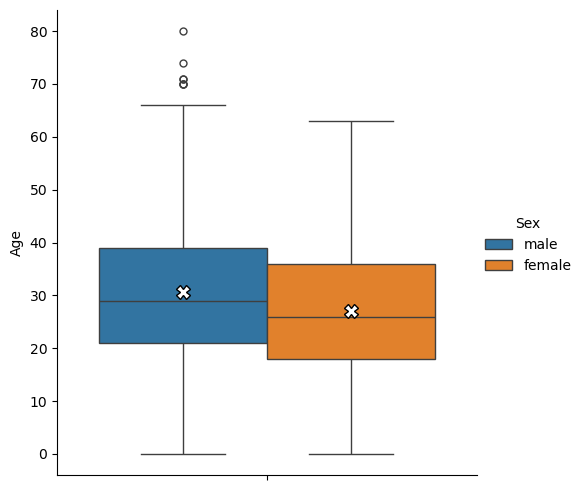

In [34]:
#Distribution of Age and Fare
sns.catplot(data=titanic_data, y='Age', hue='Sex', kind="box", showmeans=True, 
            meanprops={"marker": "X", "markerfacecolor" : "white", "markeredgecolor" : "black", "markersize" : "10"})
plt.show()

#shows some outliers in age for men, and that mean age was slightly higher for men, than for women 

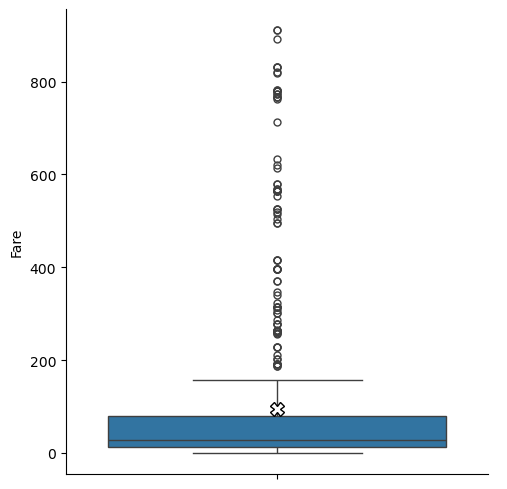

In [35]:

sns.catplot(data=titanic_data, y='Fare', kind='box', showmeans=True, 
            meanprops={"marker" : "X", "markerfacecolor" : "white", "markeredgecolor":"black", "markersize": "10"})
plt.show()

#shows that most people were paying below 200 dollars per ticket, however outliers exist paying more. 

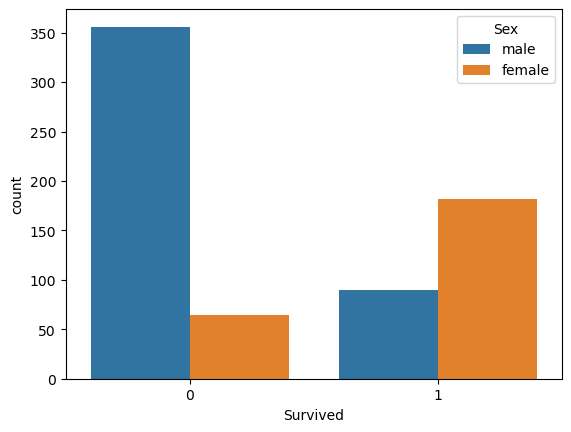

In [36]:
#showing more men died than females, and more women survived than males.
sns.countplot(x='Survived', hue="Sex", data=titanic_data)
plt.show()


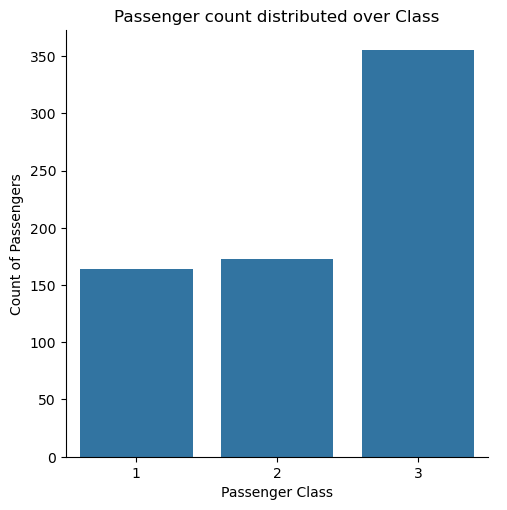

   Pclass  count
0       1    164
1       2    173
2       3    355 



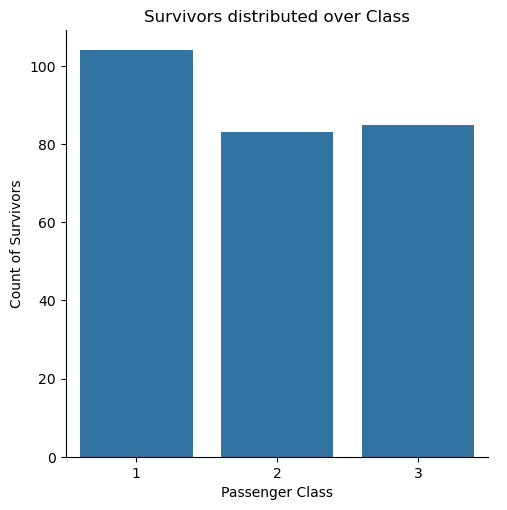

   Pclass  Survived
0       1       104
1       2        83
2       3        85 



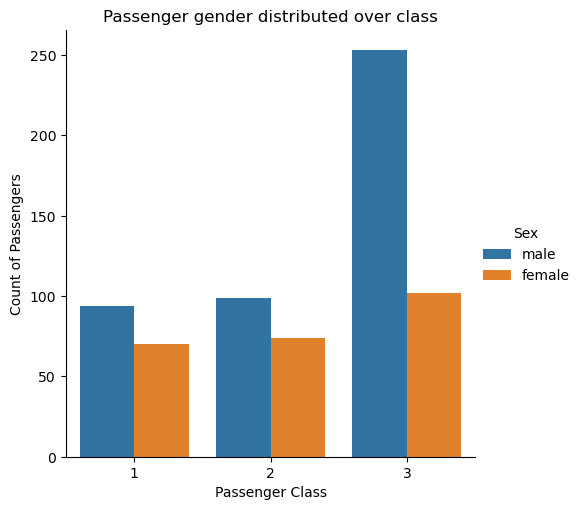

   Pclass     Sex  count
0       1    male     94
1       1  female     70
2       2    male     99
3       2  female     74
4       3    male    253
5       3  female    102 



In [37]:
# How many souls on board from each class
class_count = titanic_data['Pclass'].value_counts().sort_index(ascending=True).reset_index()

sns.catplot(data= class_count, x= 'Pclass', y='count', kind='bar')
plt.xlabel("Passenger Class")
plt.ylabel("Count of Passengers")
plt.title("Passenger count distributed over Class")
plt.show()
print(class_count, "\n")


#How many survived from each class. 
grouped = titanic_data.groupby('Pclass')['Survived'].sum().reset_index()
sns.catplot(data=grouped, x='Pclass', y='Survived', kind="bar")
plt.xlabel("Passenger Class")
plt.ylabel("Count of Survivors")
plt.title("Survivors distributed over Class")
plt.show()
print(grouped, "\n")


#how many of each gender was on board in each class.
gender_class = titanic_data.groupby('Pclass')['Sex'].value_counts().reset_index()
sns.catplot(data=gender_class, x='Pclass', y='count', hue='Sex', kind='bar')
plt.xlabel('Passenger Class')
plt.ylabel('Count of Passengers')
plt.title('Passenger gender distributed over class')
plt.show()
print(gender_class, "\n")





In [38]:
#encoding values male and female in Sex to 0 and 1 respectively
#in order to perform correlation test
titanic_data = titanic_data.replace({"male" : 0., "female": 1. })
titanic_data['Sex'].corr(titanic_data['Survived'])

C:\Users\Hassan\AppData\Local\Temp\ipykernel_7896\4003929572.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_data = titanic_data.replace({"male" : 0., "female": 1. })


0.5272825721904021

In [39]:
#One-hot encoding
# shows there are 3 types in "Embarked"
titanic_data["Embarked"].value_counts()

Embarked
S    545
C    119
Q     28
Name: count, dtype: int64

In [40]:

# by dropping first below, we create n-1 categories for n amount of categories. 
# If both existing categories are null, you can infer it must then be the third option (Embarked_C)
titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'], drop_first=True)
# translating false = 0, true = 1
titanic_data[['Embarked_Q', 'Embarked_S']] = titanic_data[['Embarked_Q', 'Embarked_S']].astype(int) 
titanic_data


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0.0,22.0,1,0,7.250,0,1
1,1,1,1.0,38.0,1,0,712.833,0,0
2,1,3,1.0,26.0,0,0,7.925,0,1
3,1,1,1.0,35.0,1,0,53.100,0,1
4,0,3,0.0,35.0,0,0,8.050,0,1
...,...,...,...,...,...,...,...,...,...
885,0,3,1.0,39.0,0,5,29.125,1,0
886,0,2,0.0,27.0,0,0,13.000,0,1
887,1,1,1.0,19.0,0,0,30.000,0,1
889,1,1,0.0,26.0,0,0,30.000,0,0


# Feature Engineering
- add column familiy size by accumulating SibSp and Parch + the person themselves

In [41]:

titanic_data["Family_Size"] = titanic_data['SibSp'] + titanic_data['Parch'] + 1
titanic_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Family_Size
0,0,3,0.0,22.0,1,0,7.250,0,1,2
1,1,1,1.0,38.0,1,0,712.833,0,0,2
2,1,3,1.0,26.0,0,0,7.925,0,1,1
3,1,1,1.0,35.0,1,0,53.100,0,1,2
4,0,3,0.0,35.0,0,0,8.050,0,1,1
...,...,...,...,...,...,...,...,...,...,...
885,0,3,1.0,39.0,0,5,29.125,1,0,6
886,0,2,0.0,27.0,0,0,13.000,0,1,1
887,1,1,1.0,19.0,0,0,30.000,0,1,1
889,1,1,0.0,26.0,0,0,30.000,0,0,1


Count of 2: 7


## Exercise 5

Do an exploratory data analysis of the diabetes dataset. The cell below loads the dataset from the scikit learn package into the pandas dataframe called `diabetes_data`.

In [43]:
from sklearn.datasets import load_diabetes
d_data = load_diabetes(as_frame=True)
diabetes_data = d_data.data
diabetes_data["Target"] = d_data.target

diabetes_data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0
